Hier sind einige Übungsaufgaben, die du mit dem **"Automobile_data.csv"**-Datensatz lösen kannst. Diese Aufgaben decken verschiedene Python-Konzepte ab, einschließlich Datenanalyse mit Pandas und Visualisierungen mit Matplotlib oder Seaborn:

---

### 1. **Daten einlesen und erste Exploration**
   - **Aufgabe**: Lese den Datensatz mit Pandas ein und zeige die ersten 10 Zeilen an.
   - **Aufgabe**: Erstelle eine Übersicht über die Spalten, die Anzahl der fehlenden Werte und die Datentypen der Spalten.
   - **Aufgabe**: Ersetze fehlende Werte (falls vorhanden) durch den Mittelwert oder Median der entsprechenden Spalte.

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('Automobile_data.csv')
df = pd.DataFrame(data)
df.head(10)

In [ ]:
# Übersicht der Spalten
df.columns

In [ ]:
# Anzahl der fehlenden Werte pro Spalte
df.isnull().sum()

In [ ]:
# Datentypen der Spalten
df.dtypes

---

### 2. **Statistische Analyse**
   - **Aufgabe**: Berechne den Mittelwert, Median, Minimum und Maximum des `price`-Attributs.
   - **Aufgabe**: Erstelle eine Pivot-Tabelle, die den Durchschnittspreis von Autos nach Herstellern (`make`) zeigt.
   - **Aufgabe**: Bestimme, welches Automodell den höchsten Preis hat und welches den niedrigsten.

In [ ]:
# der Datentyp von 'price' muss in einen numerischen Wert umgewandelt werden

# dazu muss ich erst überprüfen, ob ich nicht-numerische Platzhalter habe
print(pd.unique(df['price']))
print(df[df['price'] == '?'])

In [6]:
# diese Platzhalter in NaN umwandeln
df['price'] = df['price'].replace('?', np.nan)

# jetzt den Datentyp zuerst in float umwandeln (NaN lässt sich nicht direkt in int konvertieren!!)
df['price'] = df['price'].astype(float)

# NaN-Werte durch Mittelwert auffüllen
df['price'].fillna(df['price'].mean(), inplace=True)

# jetzt kann ich in int umwandeln!
df['price'] = df['price'].astype(int)
df['price'].dtype

C:\Users\Jens-\AppData\Local\Temp\ipykernel_25372\500560693.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


dtype('int64')

In [7]:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].min())
print(df['price'].max())

13207.126829268293
10595.0
5118
45400


In [8]:
# Pivot-Tabelle

df_pivot = df.pivot_table(index='make', values='price', aggfunc='mean')
df_pivot.round(2)

,price
make,
alfa-romero,15498.33
audi,17194.57
bmw,26118.75
chevrolet,6007.00
dodge,7875.44
honda,8184.69
isuzu,11061.75
jaguar,34600.00
mazda,10652.88


In [9]:
# df['price'].idxmax(): Findet den Index der Zeile mit dem höchsten Preis.
# df.loc[...]: Gibt die Zeile zurück, in der dieser Index vorkommt.

highest_price = df.loc[df['price'].idxmax()]
print('Marke mit höchstem Preis:', highest_price['make'], highest_price['price'])

lowest_price = df.loc[df['price'].idxmin()]
print('Marke mit dem niedrigstem Preis:', lowest_price['make'], lowest_price['price'])

Marke mit höchstem Preis: mercedes-benz 45400
Marke mit dem niedrigstem Preis: subaru 5118


---

### 3. **Visualisierungen**
   - **Aufgabe**: Erstelle ein Histogramm der `price`-Spalte, um die Verteilung der Automobilpreise zu zeigen.
   - **Aufgabe**: Erstelle ein Balkendiagramm, das die Anzahl der Autos pro Hersteller (`make`) anzeigt.
   - **Aufgabe**: Zeichne ein Scatter-Plot von `horsepower` gegen `price` und interpretiere die Korrelation.

Text(0.5, 0, 'Preis')

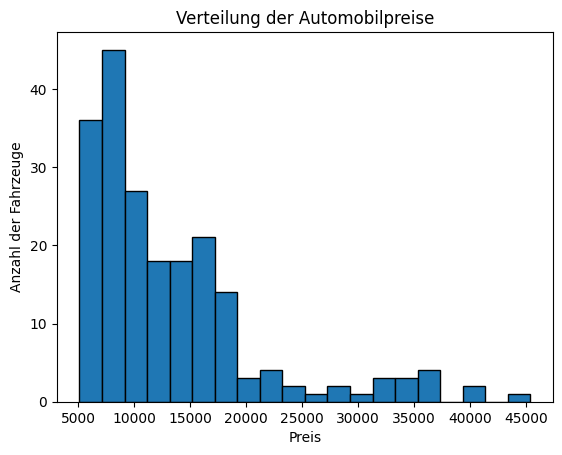

In [10]:
import matplotlib.pyplot as plt

# Erstellen des Histogramms für die price-Spalte
plt.hist(df['price'], bins=20, edgecolor='black')

plt.title('Verteilung der Automobilpreise')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xlabel('Preis')

In [11]:
cars_per_make = df['make'].value_counts()
cars_per_make

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

Text(0, 0.5, 'Anzahl der Fahrzeuge')

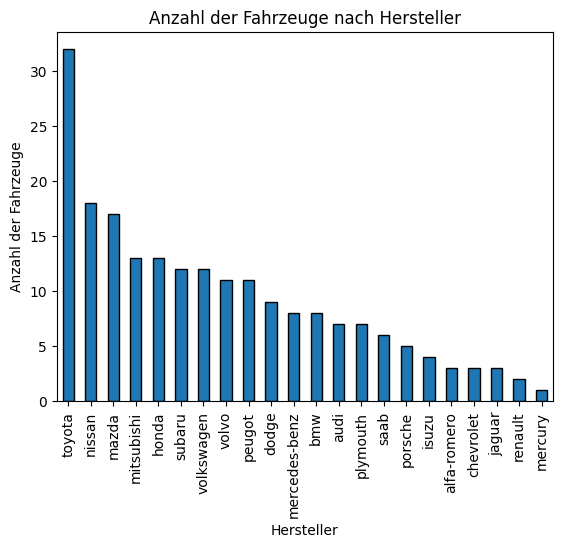

In [12]:
cars_per_make.plot(kind='bar', edgecolor='black')

plt.title('Anzahl der Fahrzeuge nach Hersteller')
plt.xlabel('Hersteller')
plt.ylabel('Anzahl der Fahrzeuge')

In [ ]:
pd.unique(df['horsepower'])

In [ ]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['horsepower'] = df['horsepower'].astype(int)

pd.unique(df['horsepower'])

Text(0.5, 1.0, 'Verteilung des Preises gegen PS')

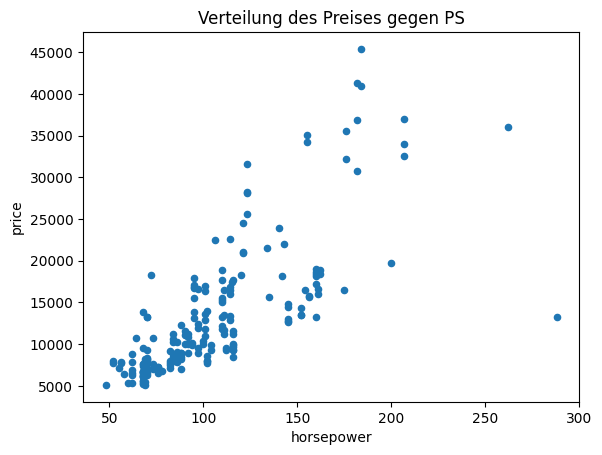

In [15]:
df.plot(kind='scatter', x='horsepower', y='price')

plt.title('Verteilung des Preises gegen PS')

In [16]:
print(df['price'].corr(df['horsepower']))

0.757945621793524


---

### 4. **Gruppenbasierte Analyse**
   - **Aufgabe**: Gruppiere die Autos nach `body-style` und finde heraus, welcher Karosserietyp den höchsten Durchschnittspreis hat.
   - **Aufgabe**: Gruppiere die Autos nach `fuel-type` und bestimme den durchschnittlichen `horsepower` pro Kraftstofftyp.

In [17]:
# gruppieren nach 'body-style' und auf dieser Gruppierung den Mittelwert des Preises bestimmen
# dann das Max und die dazugehörige ID ausgeben

avg_price_by_body_style = df.groupby(by='body-style')['price'].mean()
print(avg_price_by_body_style.idxmax(), avg_price_by_body_style.max())

hardtop 22208.5


In [18]:
df.groupby(by='fuel-type')['horsepower'].mean()

fuel-type
diesel     84.450000
gas       106.394595
Name: horsepower, dtype: float64

---

### 5. **Bivariate Analyse**
   - **Aufgabe**: Untersuche die Korrelation zwischen `engine-size` und `price`. Was sagt die Korrelation aus?
   - **Aufgabe**: Führe eine lineare Regression zwischen `horsepower` und `price` durch und interpretiere die Ergebnisse.

int64
0.861752231355783
Axes(0.125,0.11;0.775x0.77)


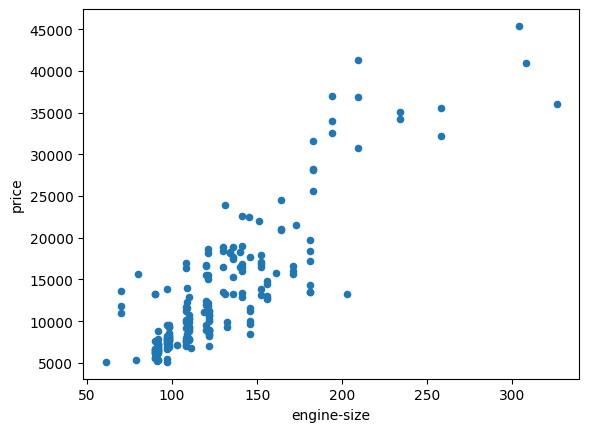

In [19]:
# testen, auf richtigen Datentyp
print(df['engine-size'].dtype)
print(df['engine-size'].corr(df['price']))
print(df.plot(kind='scatter', x='engine-size', y='price'))

# sowohl der hohe Korrelationskoeffizient von 0.86, als auch der Scatterplot zeigen eine hohe posive Korrelation zwischen Motorgröße und Preis

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Zielvariable und Feature definieren
X = df[['engine-size']]
y = df['price']

- X ist nur eine einzelne Spalte, die als 1D-Array vorliegt. Das Modell LinearRegression erwartet jedoch, dass X als 2D-Array bereitgestellt wird, auch wenn man nur ein einziges Feature hat.

Lösung:
- X muss in eine 2D-Form umgewandelt werden. 
- durch `X = df[['engine-size']]` wird X zu einem DataFrame mit einer einzigen Spalte -> verschachtelte Liste = 2 Dimensionen
- Alternativ geht auch `X = df['engine-size'].values.reshape(-1, 1)`, um es explizit zu einem 2D-Array umzuformen.


In [21]:
# Regressionsmodell festlegen 
# -> LinearRegression importieren
model = LinearRegression()


# Training-Testaufteilung 
# -> train_test_split importieren
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


# Modell trainieren
model.fit(X_train, y_train)


# Vorhersage treffen
y_pred = model.predict(X_test)


# jetzt kann ich das Modell mit verschiedenen Metriken bewerten 
# -> dafür muss ich mean_squared_error, r2_score, mean_absolute_error importieren
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(mse)
print(mae)
print(r2)

21511009.870639723
3567.5137245601836
0.6853744401832491


- mse = Gibt an, wie stark die Vorhersagen von den tatsächlichen Werten abweichen. Kleinere Werte sind besser.
- mae = Gibt die durchschnittliche Abweichung an, ohne das Quadrieren der Abweichungen (kleiner ist besser).
- r2 = Misst, wie gut das Modell die Daten erklärt (ein Wert nahe 1 bedeutet eine gute Anpassung).

In [22]:
# Koeffizient berechnen
model.coef_ 

array([164.25323483])

- Der Koeffizient gibt an, wie stark sich der Preis ändert, wenn sich die Motorgröße ändert.
- Bei einem Koeffizienten von 164.25 erhäht sich der Preis des Autos um 164.25 Einheiten, wenn die Motorgröße um 1 Einheit (cc) zunimmt

Text(0, 0.5, 'vorhergesagte Preise')

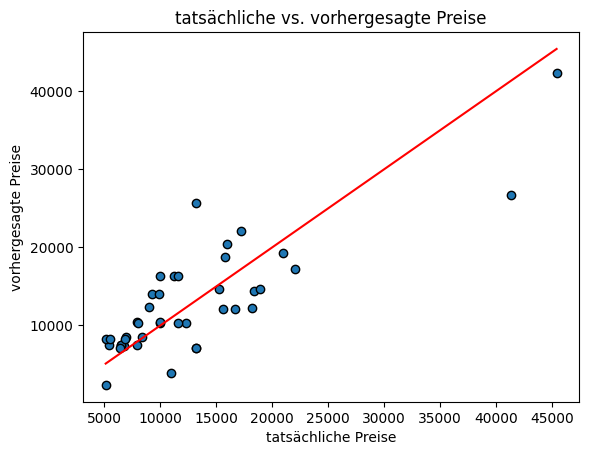

In [23]:
# Scatterplot für tatsächliche vs vorhergesagte Preise erstellen
plt.scatter(y_test, y_pred, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('tatsächliche vs. vorhergesagte Preise')
plt.xlabel('tatsächliche Preise')
plt.ylabel('vorhergesagte Preise')

- Die Regressionslinie repräsentiert die ideale Beziehung, bei der tatsächliche Preise = vorhergesagte Preise sind.

- Je näher die Punkte an dieser Linie liegen, desto besser sind die Vorhersagen des Modells.

- Wenn die Punkte entlang der Diagonalen verteilt sind und keine systematischen Abweichungen aufweisen, deutet dies darauf hin, dass das Modell die Preise gut vorhersagt.

- Wenn die Punkte weit von der Diagonalen entfernt sind, bedeutet dies, dass das Modell große Vorhersagefehler macht (die Differenz zwischen tatsächlichen und vorhergesagten Werten ist hoch).

- Punkte über der Linie: Das Modell hat den Preis unter dem tatsächlichen Wert vorhergesagt.

- Punkte unter der Linie: Das Modell hat den Preis über dem tatsächlichen Wert vorhergesagt.

- Wenn sich die meisten Punkte nahe an der Linie konzentrieren, bedeutet dies, dass das Modell in den meisten Fällen gut funktioniert.

- Wenn die Punkte jedoch weit verstreut sind, insbesondere an den Enden (hohe oder niedrige Preise), könnte dies auf ein Problem mit der Modellanpassung für extreme Werte hinweisen.

**Szenarien**

1. Gute Modellanpassung:

- Die Punkte verteilen sich eng entlang der Diagonalen, was darauf hindeutet, dass die Vorhersagen sehr nah an den tatsächlichen Preisen liegen.
- Hier würde der Korrelationskoeffizient (R²) hoch sein, und Metriken wie MSE und MAE wären niedrig.

2. Schlechte Modellanpassung:

- Wenn die Punkte weit verstreut sind oder eine systematische Abweichung aufweisen (z.B. alle Punkte liegen über oder unter der Linie), zeigt das, dass das Modell Schwierigkeiten hat, genaue Vorhersagen zu treffen.
- Hier wäre der R²-Wert niedrig, und der MSE oder MAE könnte hoch sein.

3. Nicht-lineares Verhalten:

- Wenn die Punkte ein Muster bilden (z.B. eine Kurve oder eine systematische Abweichung in bestimmten Bereichen), könnte das darauf hindeuten, dass eine lineare Regression möglicherweise nicht das richtige Modell ist. In solchen Fällen könnte ein nicht-lineares Modell oder zusätzliche Features zur Verbesserung beitragen.

### 6. **Datenbereinigung**
   - **Aufgabe**: Überprüfe den Datensatz auf duplizierte Einträge und entferne sie falls vorhanden.
   - **Aufgabe**: Normalisiere die `price`-Spalte, um sie für Modellierungstechniken vorzubereiten.

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
# Normalisierung (Skalierung zwischen 0 und 1)
df['price'] = (df['price']-df['price'].min())/((df['price'].max()-df['price'].min()))
df['price']

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

### 7. **Feature Engineering**
   - **Aufgabe**: Erstelle eine neue Spalte `price_per_horsepower`, die den Preis durch die Leistung (`horsepower`) teilt.
   - **Aufgabe**: Kategorisiere den Preis in "low", "medium" und "high", basierend auf Quantilen, und speichere diese Informationen in einer neuen Spalte.

In [ ]:
# neue Spalte anlegen
df['price_per_horsepower'] = df['price']/df['horsepower']
df

In [39]:
# Preis kategorisieren
df['price_categorie'] = pd.cut(df['price'], bins=[0, 0.25, 0.75, 1], labels=['low', 'medium', 'high'], right=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_per_horsepower,price_categorie
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,0.207959,0.001874,low
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,0.282558,0.002546,medium
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,0.282558,0.001835,medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,0.219254,0.002150,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,0.306142,0.002662,medium


### 8. **Modellierung**
   - **Aufgabe**: Teile den Datensatz in Trainings- und Testdaten auf. Verwende die Spalten `horsepower`, `engine-size` und `curb-weight`, um den `price` mit einem linearen Regressionsmodell vorherzusagen.
   - **Aufgabe**: Führe eine k-Means-Clusteranalyse basierend auf den Merkmalen `horsepower` und `price` durch und interpretiere die Cluster.

### 9. **Weitere Analyse**
   - **Aufgabe**: Finde heraus, ob Autos mit mehr Zylindern (`num-of-cylinders`) tendenziell teurer sind.
   - **Aufgabe**: Analysiere, ob es einen Unterschied im Preis zwischen Autos mit unterschiedlichen `fuel-type` (Benzin/Diesel) gibt.

Diese Übungen bieten eine gute Grundlage für Datenanalyse, Bereinigung und Modellierung mit einem realen Datensatz. Solltest du an einer spezifischen Aufgabe oder an den Lösungen interessiert sein, lass es mich wissen!